In [1]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train, y_test

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

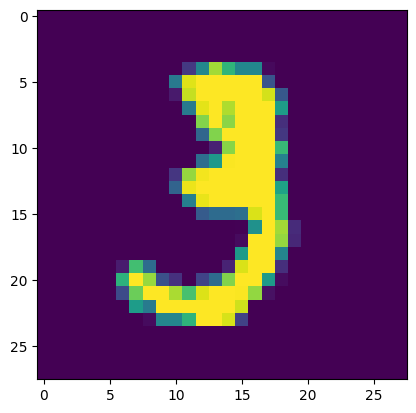

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10])

In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 26s 16ms/step - loss: 0.2971 - accuracy: 0.9133 - val_loss: 0.1484 - val_accuracy: 0.9565
Epoch 2/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1315 - accuracy: 0.9600 - val_loss: 0.1185 - val_accuracy: 0.9638
Epoch 3/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0931 - accuracy: 0.9714 - val_loss: 0.0987 - val_accuracy: 0.9703
Epoch 4/30
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.1106 - val_accuracy: 0.9668
Epoch 5/30
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0552 - accuracy: 0.9827 - val_loss: 0.1134 - val_accuracy: 0.9668
Epoch 6/30
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0448 - accuracy: 0.9857 - val_loss: 0.0852 - val_accuracy: 0.9748
Epoch 7/30
1500/1500 [==============================] - 23s 16ms/step - loss: 0.0342 - accuracy: 0.9886 - val_loss: 0.1007 -

In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [14]:
y_prob

array([[1.6138842e-18, 4.6728487e-19, 5.6270516e-21, ..., 1.0000000e+00,
        1.8867862e-25, 2.3455234e-15],
       [1.2215133e-26, 2.0464622e-18, 1.0000000e+00, ..., 4.1010406e-28,
        7.9091827e-21, 1.9424847e-36],
       [1.5475146e-13, 9.9998832e-01, 1.2840298e-06, ..., 2.8700310e-06,
        7.5370162e-06, 6.4530363e-16],
       ...,
       [2.2098558e-29, 5.0881986e-20, 1.5506602e-26, ..., 5.8026191e-13,
        8.8476879e-16, 7.7487398e-13],
       [6.9617044e-33, 3.1440233e-24, 3.8988433e-37, ..., 5.0185660e-22,
        2.3013403e-16, 3.1328721e-27],
       [4.9139740e-15, 1.2241709e-28, 1.1067913e-19, ..., 6.8888012e-38,
        5.2335274e-17, 1.5333212e-24]], dtype=float32)

In [15]:
y_pred = y_prob.argmax(axis=1)

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
y_pred[1]

2

In [18]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.9734

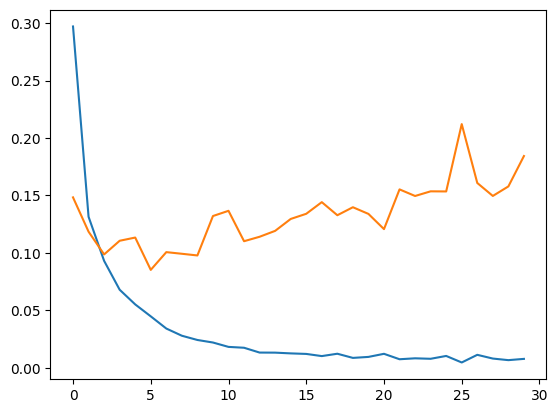

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

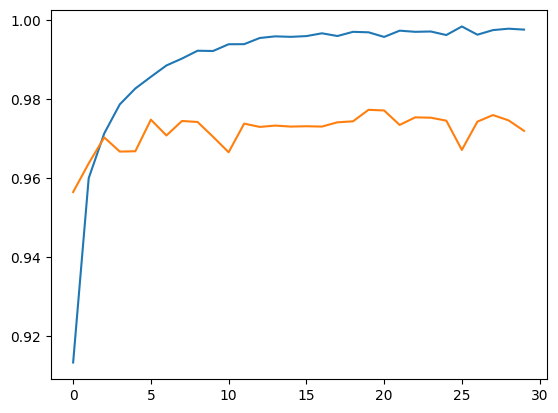

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [30]:
model.predict(X_test[9].reshape(1, 28, 28)).argmax(axis=1)

1/1 [==============================] - 0s 137ms/step


array([9], dtype=int64)